In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import puzzle_finder as pf
import solver as ss
from tqdm import tqdm

In [20]:
solutions = []
boards = []

In [21]:
vid_cap = cv2.VideoCapture('./IMG_2511.MOV')
while True:
    ret, frame = vid_cap.read()
    if not ret:
        break
    puzzle = pf.find_puzzle(frame)
    nums_only = pf.isolate_nums(puzzle)
    squares = pf.split_squares(nums_only)
    number_mask = pf.mask_numbers(squares)
    pf.center_squares(squares, number_mask)
    board = pf.apply_model(squares, number_mask)
    boards.append(board.copy())
    board, iters = ss.solve_sudoku(board)
    solutions.append(board)

vid_cap.release()
cv2.destroyAllWindows()

In [22]:
valid_solutions = [s for s in solutions if type(s) != str]

In [23]:
real_solution = np.array([
    [7, 9, 6, 1, 2, 5, 3, 4, 8],
    [4, 1, 8, 7, 3, 9, 5, 2, 6], 
    [5, 3, 2, 6, 8, 4, 7, 1, 9],
    [3, 8, 7, 2, 6, 1, 9, 5, 4],
    [9, 2, 4, 3, 5, 7, 8, 6, 1], 
    [6, 5, 1, 9, 4, 8, 2, 7, 3], 
    [2, 4, 9, 8, 7, 6, 1, 3, 5],
    [8, 6, 3, 5, 1, 2, 4, 9, 7], 
    [1, 7, 5, 4, 9, 3, 6, 8, 2]
])
print(ss.is_solved(real_solution))

True


In [24]:
real_board = np.array([
    [0, 0, 0, 0, 0, 0, 3, 0, 0],
    [4, 1, 0, 0, 3, 9, 0, 2, 6], 
    [0, 0, 0, 0, 8, 4, 0, 0, 0],
    [0, 0, 7, 0, 6, 0, 0, 5, 0],
    [0, 2, 0, 3, 0, 7, 0, 6, 0], 
    [0, 5, 0, 0, 4, 0, 2, 0, 0], 
    [0, 0, 0, 8, 7, 0, 0, 0, 0],
    [8, 6, 0, 5, 1, 0, 0, 9, 7], 
    [0, 0, 5, 0, 0, 0, 0, 0, 0]
])
num_nums = np.sum(real_board != 0)
print(ss.is_legal(real_board), num_nums)


True 28


4.547425474254743 8.306039865655954 0 1.0


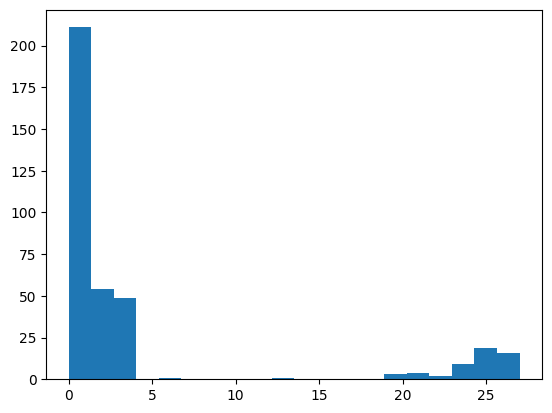

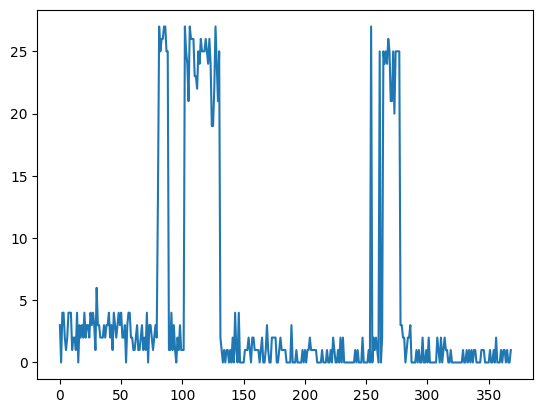

In [25]:
diff = np.array([np.sum(board != real_board) for board in boards])
print(diff.mean(), diff.std(), diff.min(), (num_nums-diff.min())/num_nums)
plt.hist(diff, bins = 20)
plt.show()
plt.plot(diff)
plt.show()

In [26]:
min_arg = np.argmin(diff)
print(boards[min_arg])

[[0 0 0 0 0 0 3 0 0]
 [4 1 0 0 3 9 0 2 6]
 [0 0 0 0 8 4 0 0 0]
 [0 0 7 0 6 0 0 5 0]
 [0 2 0 3 0 7 0 6 0]
 [0 5 0 0 4 0 2 0 0]
 [0 0 0 8 7 0 0 0 0]
 [8 6 0 5 1 0 0 9 7]
 [0 0 5 0 0 0 0 0 0]]


In [27]:
correct = 0
for board in valid_solutions:
    if np.sum(board != real_solution) == 0:
        correct += 1
correct/len(valid_solutions)

0.6666666666666666